In [199]:
!python -V

Python 3.9.2


In [200]:
from func_utils import load_dtypes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
from collections import Counter
%matplotlib inline

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [201]:
data_types = load_dtypes()

In [202]:
df = pd.read_csv('../data/raw/train.csv.gz', 
                 compression='gzip', 
                 dtype=data_types)

In [203]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [204]:
df.shape

(8921483, 83)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
 #   Column                                             Dtype   
---  ------                                             -----   
 0   MachineIdentifier                                  category
 1   ProductName                                        category
 2   EngineVersion                                      category
 3   AppVersion                                         category
 4   AvSigVersion                                       category
 5   IsBeta                                             int8    
 6   RtpStateBitfield                                   float32 
 7   IsSxsPassiveMode                                   int8    
 8   DefaultBrowsersIdentifier                          float32 
 9   AVProductStatesIdentifier                          float32 
 10  AVProductsInstalled                                float32 
 11  AVProductsEnabled                    

## Feature groups:

#### 1. Machine specs and OS:
- MachineIdentifier - Individual machine ID
- HasTpm - True if machine has tpm Trusted Platform Module (TPM)
- Platform - Calculates platform name (of OS related properties and processor property)
- Processor - This is the process architecture of the installed operating system
- OsVer - Version of the current operating system
- OsBuild - Build of the current operating system
- OsSuite - Product suite mask for the current operating system
- OsPlatformSubRelease - Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)
- OsBuildLab - Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109-2022
- SkuEdition - The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting. The valid Product Type are defined in %sdxroot%\data\windowseditions.xml. This API has been used since Vista and Server 2008, so there are many Product Types that do not apply to Windows 10. The 'SKU-Edition' is a string value that is in one of three classes of results. The design must hand each class.

#### 2. Defender Specs:    
- ProductName - Defender state information e.g. win8defender
- EngineVersion - Defender state information e.g. 1.1.12603.0
- AppVersion - Defender state information e.g. 4.9.10586.0
- AvSigVersion - Defender state information e.g. 1.217.1014.0
- IsBeta - Defender state information e.g. false
 
#### 3. Anti Virus (AV) & Security Settings:
- AVProductStatesIdentifier - ID for the specific configuration of a  user's antivirus software
- AVProductsInstalled - NA
- AVProductsEnabled - NA
- IsProtected - This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected.
- PuaMode - Pua Enabled mode from the service
- SMode - This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed
- SmartScreen - This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry. This helps you identify reported phishing and malware websites and also helps you make informed decisions about downloads. 
- Firewall - This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.
- UacLuaenable - This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA.+

#### 4. Browser & Apps:
- DefaultBrowsersIdentifier - ID for the machine's default browser
- IeVerIdentifier - NA - Should be Internet Explorer Version
- Wdft_IsGamer - Indicates whether the device is a gamer device or not based on its hardware combination.

#### 5. Geographical:
- CountryIdentifier - ID for the country the machine is located in
- CityIdentifier - ID for the city the machine is located in
- OrganizationIdentifier - ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries
- GeoNameIdentifier - ID for the geographic region a machine is located in
- LocaleEnglishNameIdentifier - English name of Locale ID of the current user

#### 6. Census Data:
- Census_MDC2FormFactor - A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. (Examples: Smartphone, Small Tablet, All in One, Convertible...)
- Census_DeviceFamily - AKA DeviceClass. Indicates the type of device that an edition of the OS is intended for. Example values: Windows.Desktop, Windows.Mobile, and iOS.Phone
- Census_OEMNameIdentifier - NA
- Census_OEMModelIdentifier - NA
- Census_ProcessorCoreCount - Number of logical cores in the processor
- Census_ProcessorManufacturerIdentifier - NA
- Census_ProcessorModelIdentifier - NA
- Census_ProcessorClass - A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated
- Census_PrimaryDiskTotalCapacity - Amount of disk space on primary disk of the machine in MB
- Census_PrimaryDiskTypeName - Friendly name of Primary Disk Type - HDD or SSD
- Census_SystemVolumeTotalCapacity - The size of the partition that the System volume is installed on in MB
- Census_HasOpticalDiskDrive - True indicates that the machine has an optical disk drive (CD/DVD)
- Census_TotalPhysicalRAM - Retrieves the physical RAM in MB
- Census_ChassisTypeName - Retrieves a numeric representation of what type of chassis the machine has. A value of 0 means xx
- Census_InternalPrimaryDiagonalDisplaySizeInInches - Retrieves the physical diagonal length in inches of the primary display
- Census_InternalPrimaryDisplayResolutionHorizontal - Retrieves the number of pixels in the horizontal direction of the internal display.
- Census_InternalPrimaryDisplayResolutionVertical - Retrieves the number of pixels in the vertical direction of the internal display
- Census_PowerPlatformRoleName - Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device
- Census_InternalBatteryType - NA
- Census_InternalBatteryNumberOfCharges - NA
- Census_OSVersion - Numeric OS version Example - 10.0.10130.0
- Census_OSArchitecture - Architecture on which the OS is based. Derived from OSVersionFull. Example - amd64
- Census_OSBranch - Branch of the OS extracted from the OsVersionFull. Example - OsBranch = fbl_partner_eeap where OsVersion = 6.4.9813.0.amd64fre.fbl_partner_eeap.140810-0005
- Census_OSBuildNumber - OS Build number extracted from the OsVersionFull. Example - OsBuildNumber = 10512 or 10240
- Census_OSBuildRevision - OS Build revision extracted from the OsVersionFull. Example - OsBuildRevision = 1000 or 16458
- Census_OSEdition - Edition of the current OS. Sourced from HKLM\Software\Microsoft\Windows NT\CurrentVersion@EditionID in registry. Example: Enterprise
- Census_OSSkuName - OS edition friendly name (currently Windows only)
- Census_OSInstallTypeName - Friendly description of what install was used on the machine i.e. clean
- Census_OSInstallLanguageIdentifier - NA
- Census_OSUILocaleIdentifier - NA
- Census_OSWUAutoUpdateOptionsName - Friendly name of the WindowsUpdate auto-update settings on the machine.
- Census_IsPortableOperatingSystem - Indicates whether OS is booted up and running via Windows-To-Go on a USB stick.
- Census_GenuineStateName - Friendly name of OSGenuineStateID. 0 = Genuine
- Census_ActivationChannel - Retail license key or Volume license key for a machine.
- Census_IsFlightingInternal - NA
- Census_IsFlightsDisabled - Indicates if the machine is participating in flighting.
- Census_FlightRing - The ring that the device user would like to receive flights for. This might be different from the ring of the OS which is currently installed if the user changes the ring after getting a flight from a different ring.
- Census_ThresholdOptIn - NA
- Census_FirmwareManufacturerIdentifier - NA
- Census_FirmwareVersionIdentifier - NA
- Census_IsSecureBootEnabled - Indicates if Secure Boot mode is enabled.
- Census_IsWIMBootEnabled - NA
- Census_IsVirtualDevice - Identifies a Virtual Machine (machine learning model)
- Census_IsTouchEnabled - Is this a touch device ?
- Census_IsPenCapable - Is the device capable of pen input ?
- Census_IsAlwaysOnAlwaysConnectedCapable - Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected .

#### 7. Unknown:
- RtpStateBitfield - NA
- IsSxsPassiveMode - NA
- AutoSampleOptIn - This is the SubmitSamplesConsent value passed in from the service, available on CAMP 9
- UacLuaenable - This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA.+

In [206]:
df.HasDetections.value_counts()

0    4462591
1    4458892
Name: HasDetections, dtype: int64

In [207]:
 df.HasDetections.isnull().sum()

0

The dataset is balanced and there are no missing values in the target variable.

Check missing values:

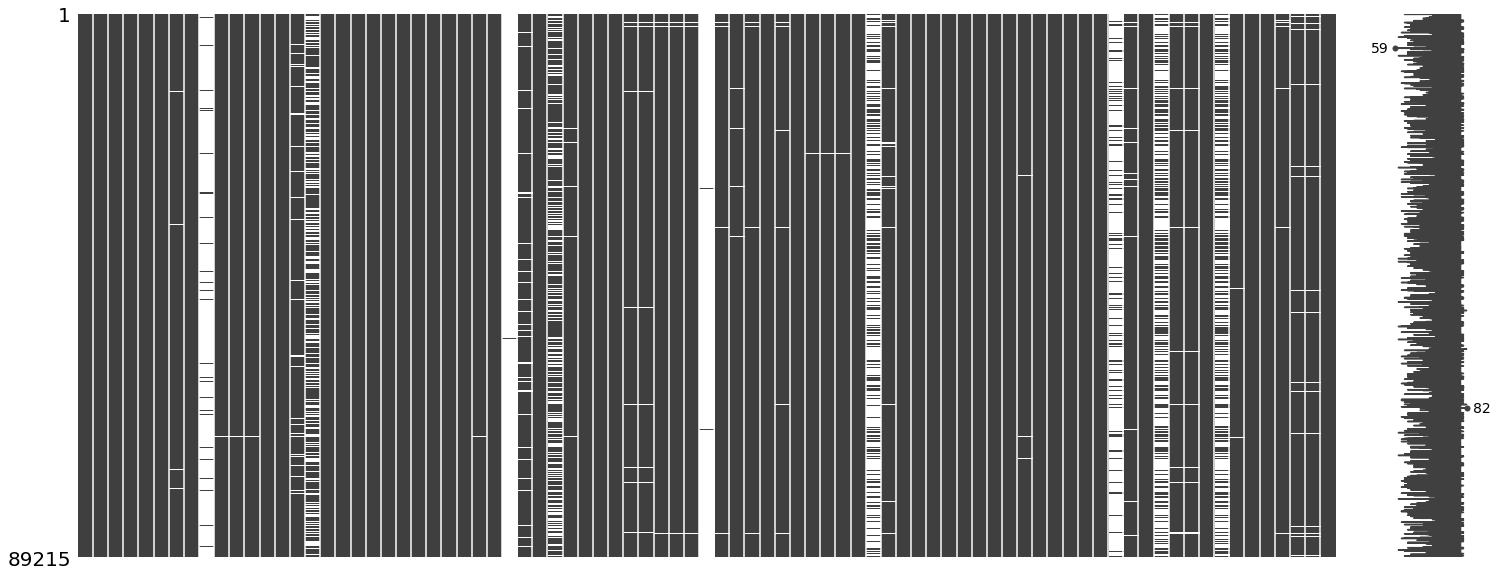

In [208]:
msno.matrix(df.sample(frac=.01));

In [209]:
missing_df = pd.concat([df.isnull().sum(), round(df.isnull().mean() * 100, 2)], axis=1)
missing_df.columns = ['missing_count', '%']
missing_df.sort_values(by='missing_count', ascending=False)[:15]

,missing_count,%
PuaMode,8919174,99.97
Census_ProcessorClass,8884852,99.59
DefaultBrowsersIdentifier,8488045,95.14
Census_IsFlightingInternal,7408759,83.04
Census_InternalBatteryType,6338429,71.05
Census_ThresholdOptIn,5667325,63.52
Census_IsWIMBootEnabled,5659703,63.44
SmartScreen,3177011,35.61
OrganizationIdentifier,2751518,30.84
SMode,537759,6.03


In [210]:
missing_list = missing_df[missing_df['%']>40].index.tolist()
missing_list

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [211]:
df[missing_list].nunique()

DefaultBrowsersIdentifier     2017
PuaMode                          2
Census_ProcessorClass            3
Census_InternalBatteryType      78
Census_IsFlightingInternal       2
Census_ThresholdOptIn            2
Census_IsWIMBootEnabled          2
dtype: int64

Drop variables with missing values > 40%:

In [212]:
df = df.drop(missing_list, axis=1)

Check for duplicates:

In [213]:
df.duplicated(keep=False).sum()

0

In [214]:
df['MachineIdentifier'].nunique(), df.shape[0]

(8921483, 8921483)

Get rid of MachineIdentifier:

In [215]:
df = df.drop('MachineIdentifier', axis=1)

In [216]:
df.shape

(8921483, 75)

In [217]:
# Separate categorical and numerical data for analysis

In [218]:
cat_col = df.select_dtypes('category').columns.tolist()
num_col = [col for col in df.columns.tolist() if col not in cat_col]

In [219]:
len(cat_col + num_col)

75

## Numerical data

In [220]:
df[num_col].head(10)

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,...,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0
1,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,...,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0
2,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,...,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0
3,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,NaN,...,355.0,20050.0,0,0.0,0,0,0.0,0.0,3.0,1
4,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,NaN,...,355.0,19844.0,0,0.0,0,0,0.0,0.0,1.0,1
5,0,7.0,0,53447.0,1.0,1.0,1,97,13598.0,27.0,...,93.0,51039.0,0,0.0,0,0,0.0,0.0,15.0,1
6,0,7.0,0,43927.0,2.0,1.0,1,78,81215.0,NaN,...,556.0,63175.0,1,0.0,0,0,0.0,0.0,10.0,1
7,0,7.0,0,53447.0,1.0,1.0,1,97,150323.0,27.0,...,512.0,63122.0,0,0.0,0,0,0.0,0.0,15.0,0
8,0,7.0,0,53447.0,1.0,1.0,1,164,155006.0,27.0,...,500.0,15510.0,0,0.0,0,0,0.0,0.0,15.0,0
9,0,7.0,0,46413.0,2.0,1.0,1,93,98572.0,27.0,...,556.0,63555.0,1,0.0,0,0,0.0,1.0,8.0,1


In [221]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
IsBeta,8921483.0,7.509962e-06,2.740421e-03,0.0,0.0,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,8889165.0,6.845333e+00,1.026055e+00,0.0,7.0,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,8921483.0,1.733378e-02,1.305118e-01,0.0,0.0,0.0,0.000000e+00,1.000000e+00
AVProductStatesIdentifier,8885262.0,4.784002e+04,1.403237e+04,3.0,49480.0,53447.0,5.344700e+04,7.050700e+04
AVProductsInstalled,8885262.0,1.326779e+00,5.229272e-01,0.0,1.0,1.0,2.000000e+00,7.000000e+00
AVProductsEnabled,8885262.0,1.020967e+00,1.675544e-01,0.0,1.0,1.0,1.000000e+00,5.000000e+00
HasTpm,8921483.0,9.879711e-01,1.090149e-01,0.0,1.0,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,8921483.0,1.080490e+02,6.304706e+01,1.0,51.0,97.0,1.620000e+02,2.220000e+02
CityIdentifier,8596074.0,8.126650e+04,4.892339e+04,5.0,36825.0,82373.0,1.237000e+05,1.679620e+05
OrganizationIdentifier,6169965.0,2.486495e+01,5.605503e+00,1.0,18.0,27.0,2.700000e+01,5.200000e+01


Census_InternalPrimaryDisplayResolutionHorizontal and Census_InternalPrimaryDisplayResolutionVertical have -1 values.

Many features here are ID's or categories encoded with numbers. It may be useful to change dtype to category and then reduce the number of classes with roll up to avoid that the classifier could attribute more value to classes that are encoded with greater number. A onehot encoding here on a reduced number of classes seems more reasonable.

Let's explore these features, at the end of this section I will reassign dtypes according to what the analysis shows.

In [222]:
df.IsProtected.unique()

array([ 1.,  0., nan], dtype=float32)

IsProtected - This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected.

Will use ordinal encoding:

In [223]:
df['IsProtected'] = df.IsProtected.map({np.nan:0.0, 0:1.0, 1:2.0}).astype('float')
df.IsProtected.unique()

array([2., 1., 0.])

In [224]:
binary_col = [col for col in num_col if df[col].nunique() <= 2]
df[binary_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 16 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   IsBeta                                   int8   
 1   IsSxsPassiveMode                         int8   
 2   HasTpm                                   int8   
 3   AutoSampleOptIn                          int8   
 4   SMode                                    float32
 5   Firewall                                 float32
 6   Census_HasOpticalDiskDrive               int8   
 7   Census_IsPortableOperatingSystem         int8   
 8   Census_IsFlightsDisabled                 float32
 9   Census_IsSecureBootEnabled               int8   
 10  Census_IsVirtualDevice                   float32
 11  Census_IsTouchEnabled                    int8   
 12  Census_IsPenCapable                      int8   
 13  Census_IsAlwaysOnAlwaysConnectedCapable  float32
 14  Wdft_IsGamer      

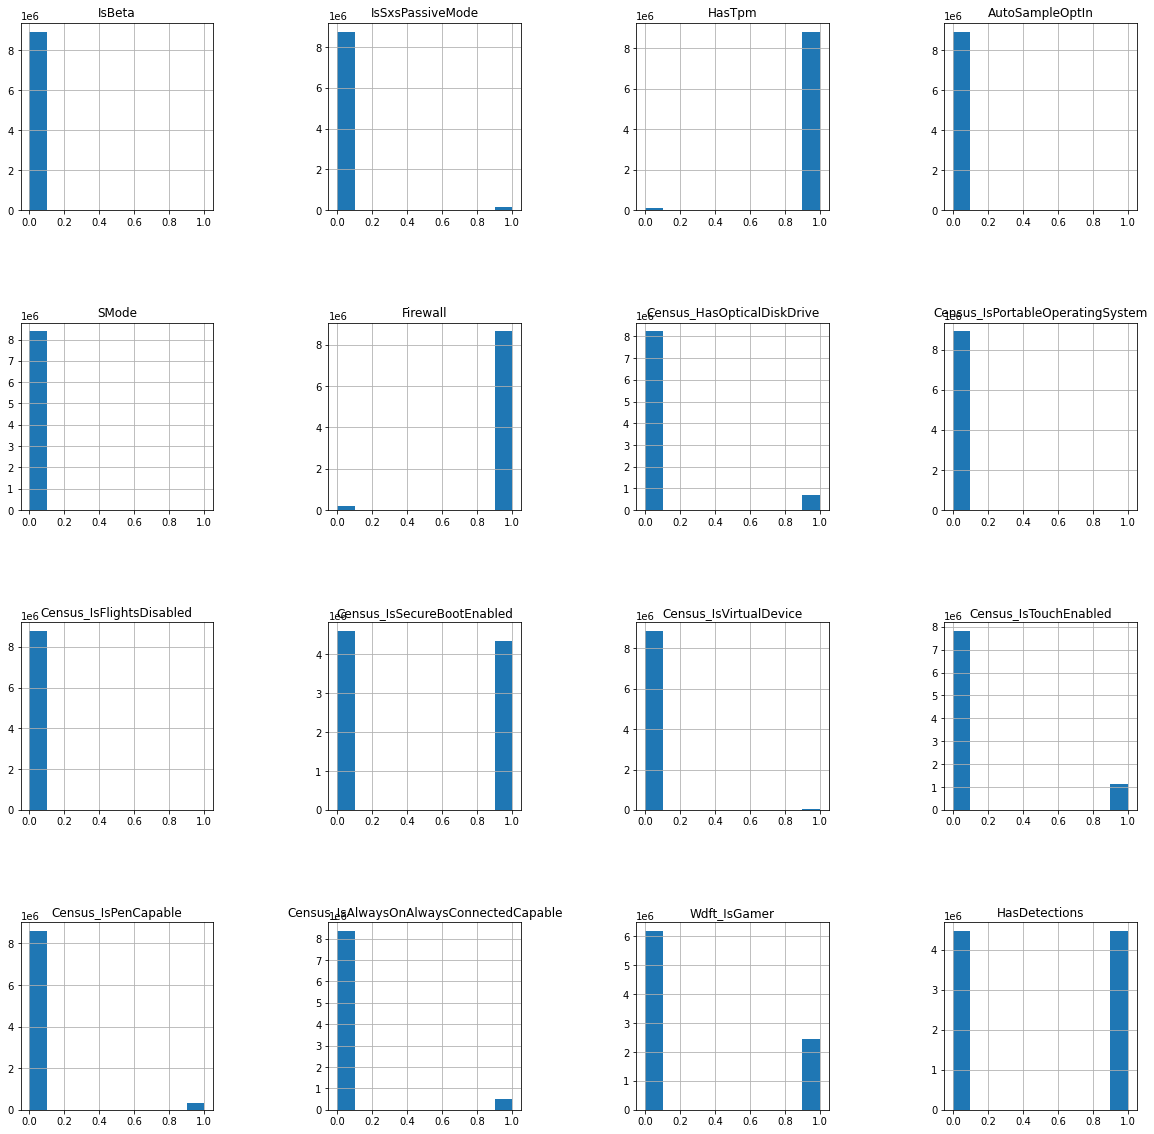

In [225]:
df[binary_col] = df[binary_col].astype('Int64')
df[binary_col].hist(figsize=(20, 20))
plt.subplots_adjust(hspace=.6, wspace=.6);

In [226]:
df[binary_col].var()

IsBeta                                     0.000008
IsSxsPassiveMode                           0.017033
HasTpm                                     0.011884
AutoSampleOptIn                            0.000029
SMode                                      0.000463
Firewall                                   0.020959
Census_HasOpticalDiskDrive                 0.071229
Census_IsPortableOperatingSystem           0.000545
Census_IsFlightsDisabled                   0.000010
Census_IsSecureBootEnabled                 0.249805
Census_IsVirtualDevice                     0.006990
Census_IsTouchEnabled                      0.109782
Census_IsPenCapable                        0.036622
Census_IsAlwaysOnAlwaysConnectedCapable    0.054122
Wdft_IsGamer                               0.203162
HasDetections                              0.250000
dtype: float64

In [227]:
[feat for feat in binary_col if df[feat].var() < 1e-4]

['IsBeta', 'AutoSampleOptIn', 'Census_IsFlightsDisabled']

In [228]:
IsBeta_contingency = pd.crosstab(df['IsBeta'], df['HasDetections'])
IsBeta_contingency

HasDetections,0,1
IsBeta,,
0,4462557,4458859
1,34,33


In [229]:
auto_smpl_contingency = pd.crosstab(df['AutoSampleOptIn'], df['HasDetections'])
auto_smpl_contingency

HasDetections,0,1
AutoSampleOptIn,,
0,4462474,4458751
1,117,141


In [230]:
flgt_dsbld_contingency = pd.crosstab(df['Census_IsFlightsDisabled'], df['HasDetections'])
flgt_dsbld_contingency

HasDetections,0,1
Census_IsFlightsDisabled,,
0,4383459,4377413
1,83,5


In [231]:
df.drop('IsBeta', axis=1, inplace=True)

Other numerical columns:

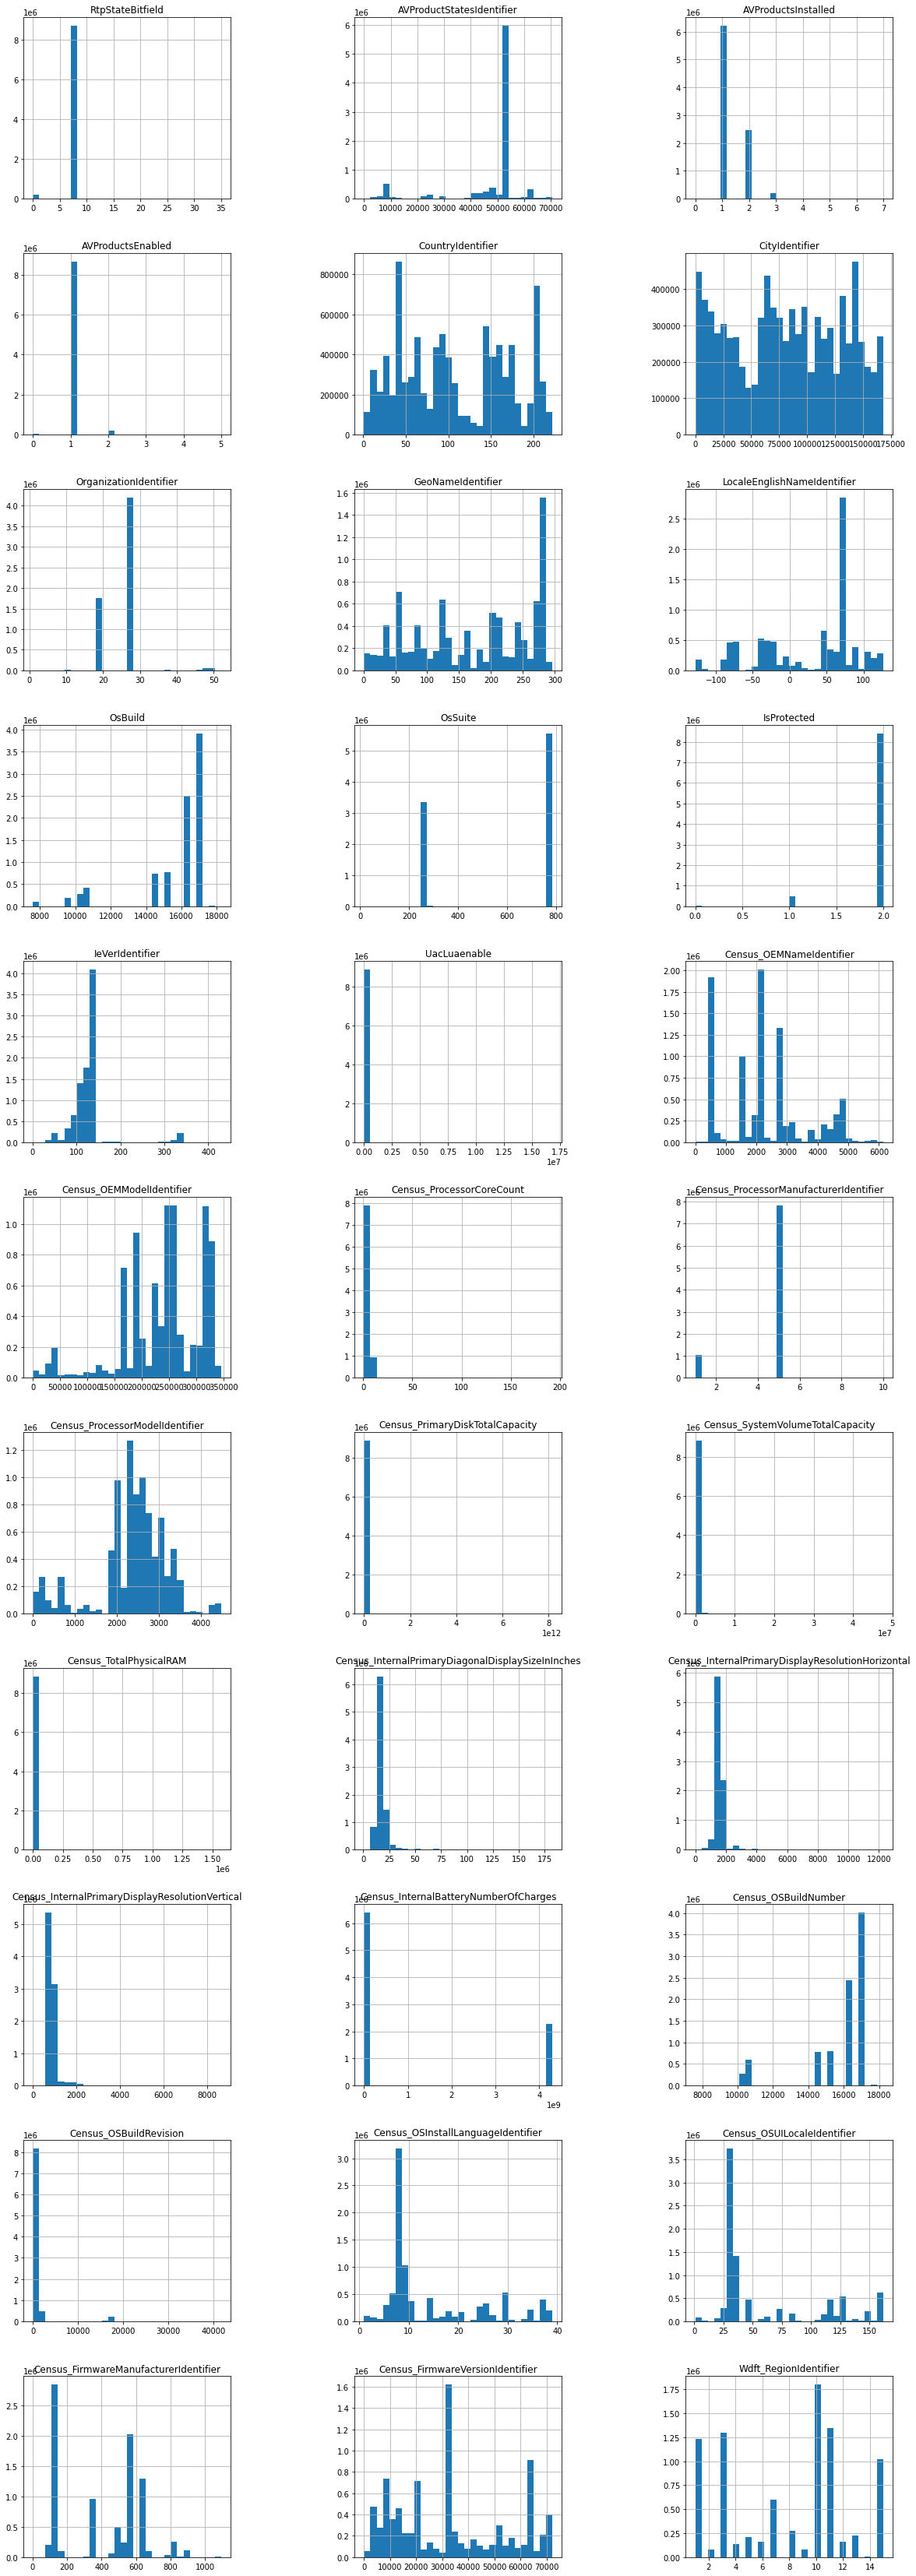

In [232]:
df.loc[:, ~df.columns.isin(binary_col)].hist(figsize=(20, 60), layout=(11, 3), bins=30)
plt.subplots_adjust(hspace=.3, wspace=.6)

Convert numerical columns which are actually categories - the current ordinal encoding is not a good choince since these features are not ordinal. I will use a different encoding, onehot probably.

In [234]:
df.RtpStateBitfield = df.RtpStateBitfield.astype('category')
df.AVProductsInstalled = df.AVProductsInstalled.astype('category')
df.AVProductsEnabled= df.AVProductsEnabled.astype('category')
df.UacLuaenable = df.UacLuaenable.astype('category')
df.OsBuild = df.OsBuild.astype('category')
df.OsSuite = df.OsSuite.astype('category')
df.Census_OSBuildNumber = df.Census_OSBuildNumber.astype('category')
df.Census_OSBuildRevision = df.Census_OSBuildRevision.astype('category')

id_col = [col for col in df.columns if 'Identifier' in col]
df[id_col] = df[id_col].astype('category')

#### Summary of numerical features and potential issues:

RtpStateBitfield: no info in metadata. The most frequent value is 7.

AVProductStatesIdentifier: these are ID's for the specific configuration of a user's antivirus software. Should treat it as categorical feature. Most ID values around 53000.

AVProductsInstalled and AVProductsEnabled: no info in metadata. Probably a count of Anti Virus Products Installed and Enabled. Likely correlated. Most of values are 1 or 2 then large left skew.

CountryIdentifier, CityIdentifier, GeoNameIdentifier, LocaleEnglishNameIdentifier: these are all ID's taking many values and all related to physical location of a machine.

OrganizationIdentifier: ID for the organization the machine belongs in. Most values are 20 and 30, could reduce to three classes: 20, 30, others.

OsBuild and OsSuite: these are again ID's of Product build and suite mask for the current operating system. OsSuite has mainly two classes.

IeVerIdentifier no info in metadata. Might have outliers for values > 300.

UacLuaenable: has outliers.

Census_OEMNameIdentifier, Census_OEMModelIdentifier: no info in metadata. Should be ID for original equipment manufacturer OEM name and model.

Census_ProcessorCoreCount: Actual number of logical cores in the processor. Most machines have < 20 cores. There are outliers maybe because of supercomputers.

Census_ProcessorManufacturerIdentifier, Census_ProcessorModelIdentifier: no info in metadata. Should be ID for processor manufacturer and model.

Census_PrimaryDiskTotalCapacity, Census_SystemVolumeTotalCapacity, Census_TotalPhysicalRAM: these are actual numerics in MB of memory. They are likely correlated and have outliers.

Census_InternalPrimaryDiagonalDisplaySizeInInches, Census_InternalPrimaryDisplayResolutionHorizontal, Census_InternalPrimaryDisplayResolutionVertical: these are dims and resolution of display. Should not be correlated with malware infections. Contain outliers.

Census_InternalBatteryNumberOfCharges: no info in metadata. It has mostly very small or very big values. Might convert it to binary feature.

All features with "OS" or "Os", i.e. those related to Operating System, present repetitions since some have been extracted from OsVer and OsBuildLab. I will need to drop these repetitions.

Census_FirmwareManufacturerIdentifier, Census_FirmwareVersionIdentifierno info in metadata. Should be ID's of Firmware Manufacturer and version.

Wdft_RegionIdentifier: no info in metadata. Should be another ID for Wdft_IsGamer.

Key points:

- Many features have outliers / extremely skewed distributions
- A few features are repeted / duplicates of other categorical features - see OS features
- Most of the numerical features are actually categories / ID's encoded as numbers
- Actual numerical features are:
    - Census_ProcessorCoreCount
    - Census_PrimaryDiskTotalCapacity
    - Census_SystemVolumeTotalCapacity
    - Census_TotalPhysicalRAM
    - Census_InternalPrimaryDiagonalDisplaySizeInInches
    - Census_InternalPrimaryDisplayResolutionHorizontal
    - Census_InternalPrimaryDisplayResolutionVertical
    - Census_InternalBatteryNumberOfCharges

Let's fix some of these problems, starting with checking obvious outliers and extremely skewed distributions. I will add the features which are not usefull to the analysis to the list to_drop and fix outliers for the other features which may have predictive power.

**Census_ProcessorCoreCount**

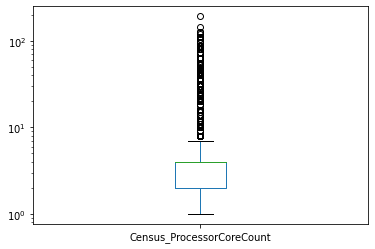

In [235]:
df.Census_ProcessorCoreCount.plot(kind='box')
plt.yscale('log');

Very few machines have more than 16 cores. 192 cores is possible for supercomputers. There aren't obvious outliers, simply most of the data dwescribes machines that are below 8 cores.

**Census_PrimaryDiskTotalCapacity**

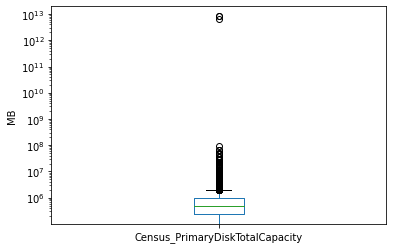

In [236]:
df.Census_PrimaryDiskTotalCapacity.plot(kind='box')
plt.yscale('log')
plt.ylabel('MB');

Other than the obvious outliers with capacity of $10^{13}$ MB, a number of machines have ~100 TB of disk space capacity. This was, in fact, the maximum SSD possible value in 2018, according to: https://en.wikipedia.org/wiki/Hard_disk_drive

Let's remove the two obvious outliers:

In [237]:
limit = 10**9
df.drop(df[df['Census_PrimaryDiskTotalCapacity'] > limit].index, inplace=True)

**Census_SystemVolumeTotalCapacity**

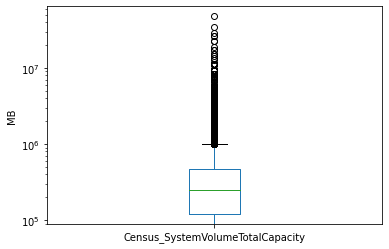

In [238]:
df.Census_SystemVolumeTotalCapacity.plot(kind='box')
plt.yscale('log')
plt.ylabel('MB');

**Census_TotalPhysicalRAM**

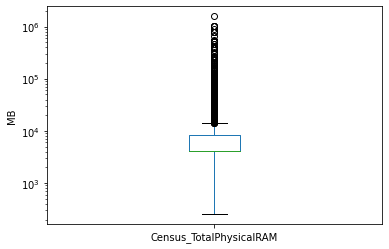

In [239]:
df.Census_TotalPhysicalRAM.plot(kind='box')
plt.yscale('log')
plt.ylabel('MB');

Outliers go from 16 to 160 TB, these are rare values but not necessarily mistakes. There are not obvious outliers.

In [240]:
#df.Census_TotalPhysicalRAM.value_counts()

#bins = [0,
#        2_000,
#        4_000,
#        8_000,
#        16_000,
#        32_000,
#        64_000,
#        128_000,
#        192_000,
#        512_000,
#        1_000_000,
#        np.inf]
#labels = ['0-2 GB', '2-4 GB', '4-8 GB', '8-16 GB',
#          '16-32 GB', '32-64 GB', '64-128 GB', 
#          '128-192 GB',  '192-512 GB', '512-1000 GB', 
#          '1+ TB']

#RAM_bins = pd.cut(df.Census_TotalPhysicalRAM,
#                     bins=bins,
#                     labels=labels)
#RAM_bins.value_counts()

#df['RAM_bins'] = RAM_bins

#df['RAM_bins'].dtype

**Census_InternalPrimaryDiagonalDisplaySizeInInches**

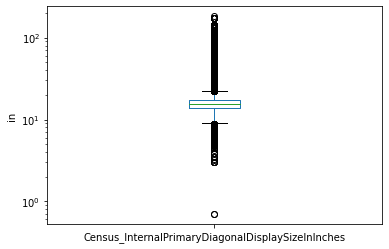

In [241]:
df.Census_InternalPrimaryDiagonalDisplaySizeInInches.plot(kind='box')
plt.yscale('log')
plt.ylabel('in');

Screens with diagonal > 80 inches are rare but a max of 140 inches is possible. Will just remove the obvious outlier < 1 in.

In [242]:
limit = 1
df.drop(df[df['Census_InternalPrimaryDiagonalDisplaySizeInInches'] < limit].index, inplace=True)

**Census_InternalPrimaryDisplayResolutionHorizontal** and **Census_InternalPrimaryDisplayResolutionVertical**


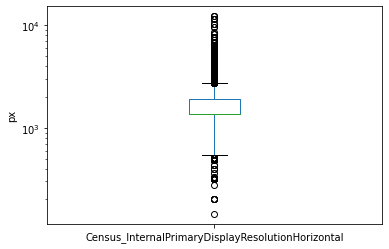

In [243]:
df.Census_InternalPrimaryDisplayResolutionHorizontal.plot(kind='box')
plt.yscale('log')
plt.ylabel('px');

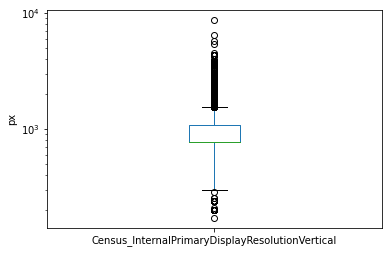

In [244]:
df.Census_InternalPrimaryDisplayResolutionVertical.plot(kind='box')
plt.yscale('log')
plt.ylabel('px');

There are not any obvious outliers but some values are -1. These will be changed to NaN.

In [245]:
df.loc[df.Census_InternalPrimaryDisplayResolutionHorizontal <= 0, 
       'Census_InternalPrimaryDisplayResolutionHorizontal'] = np.nan
df.loc[df.Census_InternalPrimaryDisplayResolutionVertical <= 0, 
       'Census_InternalPrimaryDisplayResolutionVertical'] = np.nan

**Census_InternalBatteryNumberOfCharges**

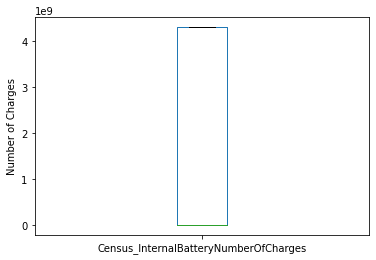

In [246]:
df.Census_InternalBatteryNumberOfCharges.plot(kind='box')
#plt.yscale('log')
plt.ylabel('Number of Charges');

In [247]:
battery_charges_count = df.Census_InternalBatteryNumberOfCharges.value_counts()
battery_charges_count[:20]

0.000000e+00    5053400
4.294967e+09    2263992
1.000000e+00      53810
2.000000e+00      28128
1.600000e+01      27348
3.000000e+00      21537
3.300000e+01      19723
4.000000e+00      18020
5.000000e+00      16190
6.000000e+00      14472
7.000000e+00      13506
8.000000e+00      12985
9.000000e+00      12020
3.740000e+02      11630
1.000000e+01      11518
1.100000e+01      11082
4.380000e+02      10707
1.200000e+01      10561
1.300000e+01       9965
1.400000e+01       9803
3.770000e+02       9716
1.500000e+01       9621
2.560000e+02       9582
2.600000e+01       9243
1.700000e+01       8937
1.800000e+01       8818
3.840000e+02       8691
1.900000e+01       8473
2.000000e+01       8322
Name: Census_InternalBatteryNumberOfCharges, dtype: int64

There is no info about this column, and most values are 0 or 4e9. Let's convert to categorical and reduce to 3 classes.

In [248]:
df.Census_InternalBatteryNumberOfCharges.isnull().sum()

268755

In [249]:
nans = df.Census_InternalBatteryNumberOfCharges.isnull()

In [250]:
df.loc[df.Census_InternalBatteryNumberOfCharges == 0, 'Census_InternalBatteryNumberOfCharges'] = 0
df.loc[(df.Census_InternalBatteryNumberOfCharges != 0) &
       (df.Census_InternalBatteryNumberOfCharges != df.Census_InternalBatteryNumberOfCharges.max()), 
       'Census_InternalBatteryNumberOfCharges'] = 'Other'
df.loc[nans, 'Census_InternalBatteryNumberOfCharges'] = np.nan
df.Census_InternalBatteryNumberOfCharges = df.Census_InternalBatteryNumberOfCharges.map({0.0:'None',
                                                                                        4294967296.0: 'Max',
                                                                                        'Other':'Other'}).astype('category')
df.Census_InternalBatteryNumberOfCharges.value_counts()

None     5053400
Max      2263992
Other    1335331
Name: Census_InternalBatteryNumberOfCharges, dtype: int64

#### Reassign dtypes and summary of data

In [251]:
df.shape

(8921478, 74)

In [252]:
num_col = ['Census_PrimaryDiskTotalCapacity', 
           'Census_SystemVolumeTotalCapacity',
           'Census_TotalPhysicalRAM',
           'Census_ProcessorCoreCount', 
           'Census_InternalPrimaryDiagonalDisplaySizeInInches',
           'Census_InternalPrimaryDisplayResolutionHorizontal',
           'Census_InternalPrimaryDisplayResolutionVertical']
binary_col = df.select_dtypes('Int64').columns.tolist()
cat_col = [col for col in df.columns
          if col not in num_col 
          if col not in binary_col]
df[cat_col] = df[cat_col][df[cat_col].notnull()].astype('str')
df[cat_col] = df[cat_col].astype('category')

In [253]:
df[cat_col].notnull()

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CountryIdentifier,CityIdentifier,...,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Wdft_RegionIdentifier
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921478,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8921479,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,True
8921480,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8921481,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [255]:
len(num_col) + len(binary_col) + len(cat_col)

74

In [256]:
df.shape

(8921478, 74)

# Categorical Features

In [257]:
df[cat_col].head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CountryIdentifier,CityIdentifier,...,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Wdft_RegionIdentifier
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,53447.0,1.0,1.0,29,128035.0,...,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,Retail,628.0,36144.0,10.0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,53447.0,1.0,1.0,93,1482.0,...,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NOT_SET,628.0,57858.0,8.0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,53447.0,1.0,1.0,86,153579.0,...,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,Retail,142.0,52682.0,3.0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,53447.0,1.0,1.0,88,20710.0,...,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,Retail,355.0,20050.0,3.0
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,53447.0,1.0,1.0,18,37376.0,...,Update,8.0,31,FullAuto,IS_GENUINE,Retail,Retail,355.0,19844.0,1.0


In [258]:
df[cat_col].describe().T

,count,unique,top,freq
ProductName,8921478,6,win8defender,8826515
EngineVersion,8921478,70,1.1.15200.1,3845063
AppVersion,8921478,110,4.18.1807.18075,5139221
AvSigVersion,8921478,8531,1.273.1420.0,102317
RtpStateBitfield,8889160,7,7.0,8651482
AVProductStatesIdentifier,8885257,28970,53447.0,5824561
AVProductsInstalled,8885257,8,1.0,6208889
AVProductsEnabled,8885257,6,1.0,8654096
CountryIdentifier,8921478,222,43,397172
CityIdentifier,8596069,107366,130775.0,94812


In [259]:
for col in cat_col:
    print(f'''
Feature: {col} 
Unique Values Count: {df[col].nunique()}
Missing Values Count: {df[col].isnull().sum()}
Value counts: 
{df[col].value_counts()}
''')   


Feature: ProductName 
Unique Values Count: 6
Missing Values Count: 0
Value counts: 
win8defender     8826515
mse                94873
mseprerelease         53
scep                  22
windowsintune          8
fep                    7
Name: ProductName, dtype: int64


Feature: EngineVersion 
Unique Values Count: 70
Missing Values Count: 0
Value counts: 
1.1.15200.1    3845063
1.1.15100.1    3675914
1.1.15000.2     265218
1.1.14901.4     212408
1.1.14600.4     160585
                ...   
1.1.13301.0          2
1.1.12802.0          1
1.1.11202.0          1
1.1.11104.0          1
1.1.10701.0          1
Name: EngineVersion, Length: 70, dtype: int64


Feature: AppVersion 
Unique Values Count: 110
Missing Values Count: 0
Value counts: 
4.18.1807.18075    5139221
4.18.1806.18062     850929
4.12.16299.15       359871
4.10.209.0          272454
4.13.17134.1        257270
                    ...   
4.13.17134.226           1
4.8.203.0                1
4.8.10240.17943          1
4.17.17686.1004


Feature: IsProtected 
Unique Values Count: 3
Missing Values Count: 0
Value counts: 
2.0    8402277
1.0     483157
0.0      36044
Name: IsProtected, dtype: int64


Feature: IeVerIdentifier 
Unique Values Count: 303
Missing Values Count: 58894
Value counts: 
137.0    3885840
117.0    1767931
108.0     474390
111.0     467828
98.0      354410
          ...   
200.0          1
404.0          1
402.0          1
40.0           1
380.0          1
Name: IeVerIdentifier, Length: 303, dtype: int64


Feature: SmartScreen 
Unique Values Count: 21
Missing Values Count: 3177010
Value counts: 
RequireAdmin    4316180
ExistsNotSet    1046182
Off              186553
Warn             135483
Prompt            34533
Block             22533
off                1350
On                  731
&#x02;              416
&#x01;              335
on                  147
requireadmin         10
OFF                   4
0                     3
Promt                 2
Enabled               1
00000000              1
&#x03


Feature: Census_OSBuildRevision 
Unique Values Count: 285
Missing Values Count: 0
Value counts: 
228      1413633
165       899712
431       546548
285       470278
547       346853
          ...   
488            1
1232           1
596            1
691            1
23418          1
Name: Census_OSBuildRevision, Length: 285, dtype: int64


Feature: Census_OSEdition 
Unique Values Count: 33
Missing Values Count: 0
Value counts: 
Core                           3469988
Professional                   3130565
CoreSingleLanguage             1945460
CoreCountrySpecific             166100
ProfessionalEducation            56698
Education                        40704
Enterprise                       35603
ProfessionalN                    28341
EnterpriseS                      20020
ServerStandard                   10128
Cloud                             6275
CoreN                             4790
ServerStandardEval                2751
EducationN                         932
EnterpriseSN         

Some categorical variables have rare classes, other have lots of classes equally frequent. Let's look at these high cardinality featurtes more in detail.

In [260]:
n_unique_list = df[cat_col].nunique().sort_values(ascending=False)
n_unique_list[:20]

Census_OEMModelIdentifier                175364
CityIdentifier                           107366
Census_FirmwareVersionIdentifier          50493
AVProductStatesIdentifier                 28970
AvSigVersion                               8531
Census_OEMNameIdentifier                   3832
Census_ProcessorModelIdentifier            3428
Census_FirmwareManufacturerIdentifier       712
OsBuildLab                                  663
Census_OSVersion                            469
IeVerIdentifier                             303
GeoNameIdentifier                           292
Census_OSBuildRevision                      285
LocaleEnglishNameIdentifier                 252
CountryIdentifier                           222
Census_OSBuildNumber                        165
Census_OSUILocaleIdentifier                 147
AppVersion                                  110
OsBuild                                      76
EngineVersion                                70
dtype: int64

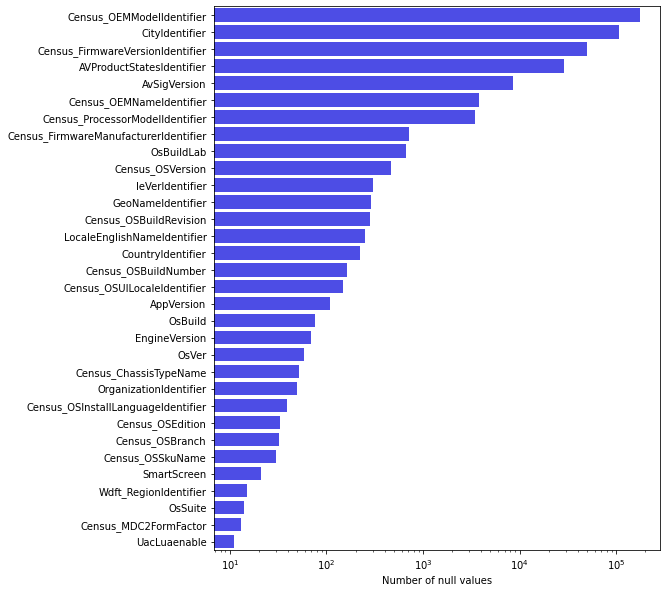

In [261]:
high_cardinality_features = n_unique_list[n_unique_list > 10]
plt.figure(figsize=(8,10))
sns.barplot(y=high_cardinality_features.index, 
            x=high_cardinality_features.values, 
            orient='h', 
            color='b', 
            alpha=.8)
plt.xscale('log')
plt.xlabel('Number of null values');

Feauture engineering will require reducing this high cardinality, e.g. with roll up tehnique. This will be performed after we gain more detail on the data in the EDA.

#### OsBuildLab

In [262]:
os_build_lab = pd.concat([df['OsBuildLab'].value_counts(),
                        df['OsBuildLab'].value_counts(normalize=True) * 100], 
                        axis=1)
os_build_lab.columns=['Count', '%']
os_build_lab.head(20)

,Count,%
17134.1.amd64fre.rs4_release.180410-1804,3658197,41.004479
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908,1252674,14.041137
16299.15.amd64fre.rs3_release.170928-1534,961060,10.772456
15063.0.amd64fre.rs2_release.170317-1834,718033,8.048383
17134.1.x86fre.rs4_release.180410-1804,257074,2.881525
16299.15.x86fre.rs3_release.170928-1534,233449,2.616714
14393.2189.amd64fre.rs1_release.180329-1711,193636,2.170453
10240.17443.amd64fre.th1.170602-2340,171990,1.927824
10586.1176.amd64fre.th2_release_sec.170913-1848,148259,1.661825
15063.0.x86fre.rs2_release.170317-1834,62237,0.697610


OsBuildLab has very high cardinality. It seems many features are generated by extracting substrings from OsBuildLab, e.g. Census_OSBranch, OsBuild, Census_OSArchitecture, OsPlatformSubRelease, etc. This feature requires lots of engineering and might be redundant. 

In [263]:
df.loc[:, df.columns.str.contains('OS|Os|os', regex=True)]

,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName
0,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN
1,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN
2,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto
3,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto
4,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,10.0.17134.191,amd64,rs4_release,17134,191,Core,CORE,Update,8.0,31,FullAuto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921478,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,10.0.16299.431,amd64,rs3_release_svc_escrow,16299,431,Core,CORE,UUPUpgrade,14.0,49,UNKNOWN
8921479,10.0.0.0,10586,256,th2,10586.672.x86fre.th2_release_sec.161024-1825,10.0.10586.679,x86,th2_release_sec,10586,679,Professional,PROFESSIONAL,Update,14.0,49,FullAuto
8921480,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,10.0.16299.371,amd64,rs3_release,16299,371,CoreCountrySpecific,CORE_COUNTRYSPECIFIC,UUPUpgrade,37.0,158,UNKNOWN
8921481,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,10.0.15063.483,amd64,rs2_release,15063,483,Core,CORE,Other,8.0,31,Notify


Let's extract features from the string in OsBuildLab and compare with other features in the dataset. The objective is to drop all the redundant columns and keep potentially useful features.

In [264]:
temp_df = pd.DataFrame()
temp_df['OsBuildLab'] = df['OsBuildLab']
temp_df['OsBuild'] = temp_df.OsBuildLab.str.split('.').str.get(0)
temp_df['OsPlatformSubRelease'] = temp_df.OsBuildLab.str.split('.').str.get(3).str.split('_').str.get(0)
temp_df['Census_OSArchitecture'] = temp_df.OsBuildLab.str.split('.').str.get(2).str.replace('fre', '')
temp_df['Census_OSBranch'] = temp_df.OsBuildLab.str.split('.').str.get(3)
temp_df.head()

,OsBuildLab,OsBuild,OsPlatformSubRelease,Census_OSArchitecture,Census_OSBranch
0,17134.1.amd64fre.rs4_release.180410-1804,17134,rs4,amd64,rs4_release
1,17134.1.amd64fre.rs4_release.180410-1804,17134,rs4,amd64,rs4_release
2,17134.1.amd64fre.rs4_release.180410-1804,17134,rs4,amd64,rs4_release
3,17134.1.amd64fre.rs4_release.180410-1804,17134,rs4,amd64,rs4_release
4,17134.1.amd64fre.rs4_release.180410-1804,17134,rs4,amd64,rs4_release


In [265]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8921478 entries, 0 to 8921482
Data columns (total 5 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   OsBuildLab             category
 1   OsBuild                object  
 2   OsPlatformSubRelease   object  
 3   Census_OSArchitecture  object  
 4   Census_OSBranch        object  
dtypes: category(1), object(4)
memory usage: 357.4+ MB


In [266]:
df[temp_df.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8921478 entries, 0 to 8921482
Data columns (total 5 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   OsBuildLab             category
 1   OsBuild                category
 2   OsPlatformSubRelease   category
 3   Census_OSArchitecture  category
 4   Census_OSBranch        category
dtypes: category(5)
memory usage: 119.1 MB


In [267]:
for col in temp_df.columns:
    if col != 'OsBuildLab':
        if col == 'OsBuild':
            print('{}% of the {} entries are different.'.format(round(np.mean(df[col].astype('float') != temp_df[col].astype('float'))*100, 2), col))       
        else:
            print(f'{round(np.mean(df[col] != temp_df[col])*100 ,2)}% of the {col} entries are different.')

0.0% of the OsBuild entries are different.
3.47% of the OsPlatformSubRelease entries are different.
0.18% of the Census_OSArchitecture entries are different.
11.67% of the Census_OSBranch entries are different.


OsBuild is 100% extracted from OsBuildLab. Also, looking at the df containing all OS features, it seems like also Census_OSBuildNumber is redundant and no different than OsBuild.

In [268]:
check_redundant_features = ['Census_OSBuildNumber']
for feat in check_redundant_features:
    print('{}% of the {} entries are different.'
          .format(round(np.mean(df[feat].astype('float') 
                                != df['OsBuild'].astype('float'))*100, 
                        2), feat))

4.99% of the Census_OSBuildNumber entries are different.


In [269]:
df[['OsBuild', 
    'Census_OSBuildNumber', 
    'Census_OSVersion']][df['OsBuild'].astype('float') != df['Census_OSBuildNumber'].astype('float')]

,OsBuild,Census_OSBuildNumber,Census_OSVersion
16,7601,10586,10.0.10586.164
17,16299,17134,10.0.17134.191
20,9600,14393,10.0.14393.0
41,9600,10586,10.0.10586.545
49,9600,10586,10.0.10586.14
...,...,...,...
8921369,17134,16299,10.0.16299.431
8921400,7601,10586,10.0.10586.164
8921442,9600,17134,10.0.17134.112
8921452,9600,10586,10.0.10586.318


Census_OSBuildNumber differs from OsBuild for ~5% of the entries. Let's add it to the drop list.

In [270]:
to_drop = []
to_drop.append('Census_OSBuildNumber')

In [271]:
def compare_feature(col_name):
    ''' 
    Reads column name (str). 
    Returns a df summarizing comparing original and 
    extracted features, a list of tuples containing the 
    different element, and the count of different elements
    '''
    df_1 = pd.DataFrame(df[df[col_name] != temp_df[col_name]][['OsBuildLab', col_name]].values, columns=['OsBuildLab', col_name+'1'])
    df_2 = pd.DataFrame(temp_df[df[col_name] != temp_df[col_name]][col_name].values, columns=[col_name+'2'])
    comparison_df = pd.concat([df_1, df_2], axis=1)
    comp_list = list(zip(comparison_df.iloc[:, 1], comparison_df.iloc[:, 2]))

    return comparison_df, comp_list, Counter(comp_list)

In [272]:
comparison_df, comp_list, tuple_counts = compare_feature('OsPlatformSubRelease')

In [273]:
comparison_df.head()

,OsBuildLab,OsPlatformSubRelease1,OsPlatformSubRelease2
0,7601.18409.amd64fre.win7sp1_gdr.140303-2144,windows7,win7sp1
1,9600.19067.x86fre.winblue_ltsb_escrow.180619-2033,windows8.1,winblue
2,9600.19067.amd64fre.winblue_ltsb_escrow.180619...,windows8.1,winblue
3,9600.19125.amd64fre.winblue_ltsb.180812-0703,windows8.1,winblue
4,9600.19000.amd64fre.winblue_ltsb.180410-0600,windows8.1,winblue


In [274]:
tuple_counts

Counter({('windows7', 'win7sp1'): 93308,
         ('windows8.1', 'winblue'): 194497,
         ('prers5', 'rs5'): 15015,
         ('prers5', 'rs'): 5976,
         ('windows7', 'win7'): 581,
         ('rs4', 'rs1'): 12,
         ('rs4', 'rs3'): 2,
         ('rs4', nan): 7,
         ('windows8.1', nan): 9,
         ('rs3', nan): 5,
         ('rs3', 'rs1'): 1,
         ('prers5', 'rs4'): 1,
         ('rs4', 'rs6'): 1,
         ('windows8.1', 'rs4'): 1})

It looks like the values are consistent.

In [275]:
comparison_df, comp_list, tuple_counts = compare_feature('Census_OSArchitecture')
tuple_counts

Counter({('x86', 'amd64'): 7619,
         ('amd64', 'x86'): 8069,
         ('x86', nan): 2,
         ('amd64', nan): 19})

It looks like the the 64 and 32 bits are switched occasionally.

In [276]:
comparison_df, comp_list, tuple_counts = compare_feature('Census_OSBranch')
comparison_df

,OsBuildLab,Census_OSBranch1,Census_OSBranch2
0,7601.18409.amd64fre.win7sp1_gdr.140303-2144,th2_release,win7sp1_gdr
1,16299.431.amd64fre.rs3_release_svc_escrow.1805...,rs4_release,rs3_release_svc_escrow
2,9600.19067.x86fre.winblue_ltsb_escrow.180619-2033,rs1_release,winblue_ltsb_escrow
3,10240.17914.amd64fre.th1.180627-1911,th1_st1,th1
4,14393.576.x86fre.rs1_release_inmarket.161208-2252,rs1_release,rs1_release_inmarket
...,...,...,...
1041343,14393.576.amd64fre.rs1_release_inmarket.161208...,rs1_release,rs1_release_inmarket
1041344,9600.19101.amd64fre.winblue_ltsb_escrow.180718...,rs4_release,winblue_ltsb_escrow
1041345,9600.17630.amd64fre.winblue_r7.150109-2022,th2_release,winblue_r7
1041346,10240.17443.amd64fre.th1.170602-2340,th1_st1,th1


In [277]:
tuple_counts

Counter({('th2_release', 'win7sp1_gdr'): 1649,
         ('rs4_release', 'rs3_release_svc_escrow'): 42896,
         ('rs1_release', 'winblue_ltsb_escrow'): 31252,
         ('th1_st1', 'th1'): 179636,
         ('rs1_release', 'rs1_release_inmarket'): 105908,
         ('th2_release', 'winblue_ltsb_escrow'): 72699,
         ('th2_release', 'winblue_ltsb'): 32633,
         ('th2_release', 'th2_release_sec'): 71601,
         ('rs3_release_svc_escrow', 'rs3_release'): 12335,
         ('rs4_release', 'rs3_release'): 46023,
         ('th2_release', 'th2_release_inmarket'): 4355,
         ('rs1_release', 'rs1_release_sec'): 36354,
         ('rs1_release', 'rs1_release_1'): 41670,
         ('th2_release', 'win7sp1_ldr'): 36923,
         ('th2_release', 'win7sp1_ldr_escrow'): 27165,
         ('rs3_release', 'rs3_release_svc_escrow'): 35884,
         ('rs3_release', 'rs3_release_svc'): 45527,
         ('rs4_release', 'rs2_release'): 4645,
         ('th1', 'th1_st1'): 3435,
         ('rs1_release', 

There are more incosistencies here, I will extract **branch release** from **OsBuildLab** for further processing. The other eeatures extracted from **OsBuildLab** are actually already present in the dataset. Hence, after extracting the **branch release** I can drop **OsBuildLab**.

In [278]:
df['Census_OSBranch_release_extracted'] = df.OsBuildLab.str.split('.').str.get(3)
df['Census_OSBranch_release_extracted'] = df['Census_OSBranch_release_extracted'].astype('category')
df['Census_OSBranch_release_extracted']

0                     rs4_release
1                     rs4_release
2                     rs4_release
3                     rs4_release
4                     rs4_release
                    ...          
8921478    rs3_release_svc_escrow
8921479           th2_release_sec
8921480               rs3_release
8921481               rs2_release
8921482               rs4_release
Name: Census_OSBranch_release_extracted, Length: 8921478, dtype: category
Categories (51, object): ['rs1_release', 'rs1_release_1', 'rs1_release_d', 'rs1_release_inmarket', ..., 'winblue_r7', 'winblue_r8', 'winblue_r9', 'winblue_rtm']

In [279]:
to_drop.append('OsBuildLab')

There is still a couple possible redundancies in the data.

**Census_OSBranch** and **OsPlatformSubRelease**  likely carry same info:

In [280]:
df[df.Census_OSBranch.astype('object') != df.OsPlatformSubRelease.astype('object')][['Census_OSBranch', 'OsPlatformSubRelease']]

,Census_OSBranch,OsPlatformSubRelease
0,rs4_release,rs4
1,rs4_release,rs4
2,rs4_release,rs4
3,rs4_release,rs4
4,rs4_release,rs4
...,...,...
8921478,rs3_release_svc_escrow,rs3
8921479,th2_release_sec,th2
8921480,rs3_release,rs3
8921481,rs2_release,rs2


In [281]:
np.mean(df.Census_OSBranch.astype('object').str.split('_').str.get(0) != df.OsPlatformSubRelease.astype('object'))

0.05193735836147329

In [282]:
df[['Census_OSBranch', 'OsPlatformSubRelease']][df.Census_OSBranch.astype('object').str.split('_').str.get(0) != df.OsPlatformSubRelease.astype('object')]

,Census_OSBranch,OsPlatformSubRelease
16,th2_release,windows7
17,rs4_release,rs3
20,rs1_release,windows8.1
41,th2_release,windows8.1
49,th2_release,windows8.1
...,...,...
8921400,th2_release,windows7
8921442,rs4_release,windows8.1
8921452,th2_release,windows8.1
8921457,rs5_release,prers5


In [283]:
to_drop.append('Census_OSBranch')
to_drop

['Census_OSBuildNumber', 'OsBuildLab', 'Census_OSBranch']

In [284]:
df = df.drop(to_drop, axis=1)

In [285]:
df.shape

(8921478, 72)

#### Summary of columns by type

In [286]:
cat_col = df.select_dtypes('category').columns.tolist()
binary_col = df.select_dtypes('Int64').columns.tolist()
num_col = [col for col in df.columns if col not in cat_col if col not in binary_col]

In [287]:
cat_col 

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'RtpStateBitfield',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'SkuEdition',
 'IsProtected',
 'IeVerIdentifier',
 'SmartScreen',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census

In [288]:
num_col 

['Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical']

In [289]:
binary_col

['IsSxsPassiveMode',
 'HasTpm',
 'AutoSampleOptIn',
 'SMode',
 'Firewall',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightsDisabled',
 'Census_IsSecureBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'HasDetections']

In [290]:
id_col = [col for col in df.columns if 'Identifier' in col]
id_col

['AVProductStatesIdentifier',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdft_RegionIdentifier']

In [291]:
len(cat_col)

50

In [292]:
len(num_col)

7

In [293]:
len(binary_col)

15

In [294]:
len(cat_col) + len(num_col) + len(binary_col)

72

In [302]:
df.to_pickle('../data/interim/train_clean.pickle')

#### Summary:
- The dataset has 8921483 and 83 features, including the target variable "HasDetections";
- Features include numerical (continuous and discrete) and categorical (strings, numerical encoding, and binary);
- The target variable is perfectly balanced and has no missing values;
- The columns which contain more than 40% null values have been dropped, these are:
    - 'DefaultBrowsersIdentifier',
    - 'PuaMode',
    - 'Census_ProcessorClass',
    - 'Census_InternalBatteryType',
    - 'Census_IsFlightingInternal',
    - 'Census_ThresholdOptIn',
    - 'Census_IsWIMBootEnabled'
- There are no duplicated in the dataset;
- The 'MachineIdentifier' column has been dropped;
- Categorical features with very high cardinality have been investigated and pointed out for further processing. Feature roll-up will be performed to reduce cardinality - this step is postponed to the EAD section, as I need to investigate the correlations between categories and target. 
- Categorical features reporting software version in the form x.xxx.xxxxx.xxxx, where x's are version number, have been process to extract clean features. These are labeled as "feature_name_extracted". The original features were then dropped after the processing. Some of the extrated features turned out to be redundant, e.g. 'Census_OSVersion_extracted', hence after dropping the redundant features the extracted features are: 
    - 'AvSigVersion_extracted',
    - 'AppVersion_extracted',
    - 'EngineVersion_extracted',
    - 'Census_OSBranch_release_extracted'
- Encodings of 'IsProtected' and 'OsVer' were changed and relabeled as 'IsProtected_encoded' and 'OsVer_encoded', respectively;
- Spelling mistakes in some categories were fixed in 'Census_OSEdition' and 'SmartScreen', e.g. categories labeled as "OFF", "Off", "off", etc.;
- Features related to the OS were investigated, those redundant have been dropped, i.e. 'OsBuildLab', 'Census_OSVersion_extracted' and 'Census_OSBuildNumber';
- Binary features types were set to 'Int64' since those contining nan's were stored as float64 (python default);
- Binary 'IsBeta' was dropped as it has no predictive power;
- Categorical features encoded with numbers were changed to category dtype. I will perform some encoding (roll-up) here as well since many have high cardinality;
- Obvious outliers have been eliminated from numerical columns, although some extreme values still exist and will be evaluated in the EAD;
- The cleaned data set has 8921478 and 72 columns of which 50 are categorical and 22 numerical. Of the numerical, 15 are binary.